In [2]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def processRegressionData(drug_names=None, path="../Data/Drugs_data/Regression/"):
    if not drug_names:
        drug_names = os.listdir(path)
        drug_names = [drug_names[i] for i in range(len(drug_names)) if drug_names[i].endswith(".csv") and not drug_names[i].__contains__("_preprocessed")]
    for drug_name in drug_names:
        print(drug_name, end="\t")
        data = pd.read_csv(path + drug_name, index_col="Unnamed: 0")
        data.drop(["Primary Cell Line Name",
                   "Target", "Doses (uM)",
                   "Activity Data (median)",
                   "Activity SD",
                   "Num Data",
                   "FitType",
                   "EC50 (uM)", 
                   "Compound", 
                   "Amax", 
                   "ActArea"], axis=1, inplace=True)
        data.dropna(axis=0, how="any", inplace=True)
        data.to_csv(path + drug_name.split(".")[0] + "_preprocessed.csv", index_label="Cell Line")
        print("is finished!")

In [40]:
files = ['TAE684.csv',
         'PHA-665752.csv', 
         'AZD6244.csv',
         'AZD6244.csv',
         'RAF265.csv',
         'Sorafenib.csv',
         'Topotecan.csv']
processRegressionData(drug_names=files)

TAE684.csv	is finished!
PHA-665752.csv	is finished!
AZD6244.csv	is finished!
AZD6244.csv	is finished!
RAF265.csv	is finished!
Sorafenib.csv	is finished!
Topotecan.csv	is finished!


In [36]:
y_data = data['IC50 (uM)']
x_data = data.drop(['IC50 (uM)'], axis=1)

In [33]:
y_data = pd.DataFrame(np.reshape(y_data.as_matrix(), (-1, 1)))
y_data = pd.DataFrame(normalize(y_data.as_matrix(), axis=0, norm='max'))

/Users/Future/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/Future/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


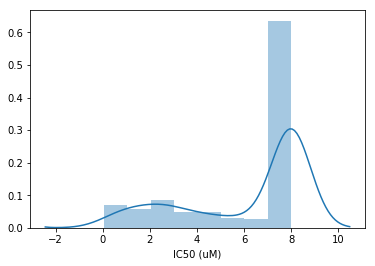

In [37]:
import seaborn as sns
sns.distplot(y_data)
plt.show()

In [21]:
import os
import pandas as pd
import numpy as np
path = "../Data/CCLE/Regression/"
new_path = "../Data/CCLE/Classification/"
files = os.listdir("../Data/CCLE/Regression/")
os.makedirs("../Results/CCLE/Drug Plots", exist_ok=True)
for file in files:
    if file.endswith("_preprocessed.csv"):
        print(file, end="\t")
        drug_name = file.split(".")[0].split("_")[0]
        data = pd.read_csv(path + file, index_col="Cell Line")
#         print(data)
        data['class'] = np.nan
#         sd = data['IC50 (uM)'].std()
#         mean = data['IC50 (uM)'].mean()
#         k = 0.25
#         upper_threshold = mean + k * sd
#         lower_threshold = mean - k * sd
#         plt.close("all")
#         plt.figure(figsize=(15, 10))
#         sns.distplot(data["IC50 (uM)"])
#         plt.axvline(x=upper_threshold, color='r', linestyle='dashed')
#         plt.axvline(x=lower_threshold, color='r', linestyle='dashed')
#         plt.ylabel("Frequency")
#         plt.xlabel("IC50")
#         plt.title("%s Distibution (UpperThreshold = %.4f) (LowerThreshold = %.4f)" % (drug_name, upper_threshold, lower_threshold))
#         plt.savefig("../Results/CCLE/Drug Plots/" + drug_name + ".pdf")
#         scaler = MinMaxScaler(feature_range=(-1, 1))
#         data["IC50 (uM)"] = scaler.fit_transform(np.reshape(data["IC50 (uM)"].values, newshape=(-1, 1)))
#         sd = data['IC50 (uM)'].std()
#         mean = data['IC50 (uM)'].mean()
#         k = 0.25
#         upper_threshold = mean + k * sd
#         lower_threshold = mean - k * sd
#         plt.close("all")
#         plt.figure(figsize=(15, 10))
#         sns.distplot(data["IC50 (uM)"])
#         plt.axvline(x=upper_threshold, color='r', linestyle='dashed')
#         plt.axvline(x=lower_threshold, color='r', linestyle='dashed')
#         plt.ylabel("Frequency")
#         plt.xlabel("Normalized IC50")
#         plt.title("%s (Normalized) Distibution (UpperThreshold = %.4f) (LowerThreshold = %.4f)" % (drug_name, upper_threshold, lower_threshold))
#         plt.savefig("../Results/CCLE/Drug Plots/" + drug_name + "_normalized.pdf")
        data.loc[data['IC50 (uM)'] >= 8, 'class'] = 1 # resistant
        data.loc[data['IC50 (uM)'] < 8, 'class'] = 0 # sensitive
        data.dropna(how='any', axis=0, inplace=True)
        data.drop(["IC50 (uM)"], axis=1, inplace=True)
        data.to_csv(new_path + file.split("_")[0] + ".csv", index_label="Cell Line")
        print("is finished!")

TAE684_preprocessed.csv	is finished!
PHA-665752_preprocessed.csv	is finished!
AZD6244_preprocessed.csv	is finished!
RAF265_preprocessed.csv	is finished!
Sorafenib_preprocessed.csv	is finished!
Topotecan_preprocessed.csv	is finished!
PF2341066_preprocessed.csv	is finished!
PD-0325901_preprocessed.csv	is finished!
L-685458_preprocessed.csv	is finished!
Nutlin-3_preprocessed.csv	is finished!
17-AAG_preprocessed.csv	is finished!
ZD-6474_preprocessed.csv	is finished!
LBW242_preprocessed.csv	is finished!
PLX4720_preprocessed.csv	is finished!
AEW541_preprocessed.csv	is finished!
Erlotinib_preprocessed.csv	is finished!
PD-0332991_preprocessed.csv	is finished!
Panobinostat_preprocessed.csv	is finished!
AZD0530_preprocessed.csv	is finished!
Nilotinib_preprocessed.csv	is finished!
TKI258_preprocessed.csv	is finished!
Paclitaxel_preprocessed.csv	is finished!
Lapatinib_preprocessed.csv	is finished!
Irinotecan_preprocessed.csv	is finished!


In [11]:
path = "../Data/CCLE/Regression/"
files = os.listdir(path)
files = [files[i] for i in range(len(files)) if files[i].endswith("_preprocessed.csv")]
files = sorted(files)

In [ ]:
for file in files:
    data = pd.read_csv(path + file, index_col="Cell Line")
    cell_lines = data.index.tolist()
    ic50_values = data["IC50 (uM)"]
    ic50_values_normalized = sorted(ic50_values)
    plt.close("all")
    plt.figure(figsize=(15, 10))
    plt.bar(y_pos, ic50_values_normalized)
    plt.xticks(y_pos, cell_lines, rotation=45)
    plt.show()
    break

In [23]:
compounds = os.listdir("../Data/CCLE/Classification/")
compounds = [compounds[i] for i in range(len(compounds)) if compounds[i].endswith(".csv") ]
compounds = sorted(compounds)
for compound in compounds:
    data = pd.read_csv("../Data/CCLE/Classification/" + compound)
    n_resistant = len(data[data['class'] == 1])
    n_sensitive = len(data[data['class'] == 0])
    n_total = n_resistant + n_sensitive
    p_resistant = float(n_resistant / n_total) * 100.0
    p_sensitive = float(n_sensitive / n_total) * 100.0
    print("%s & 8.000 & %d & %.2f\\" % (compound.split(".")[0], n_resistant, p_resistant) + "%" + " & %d & %.2f" % (n_sensitive, p_sensitive) + "\\%\\\\")

17-AAG & 8.000 & 26 & 5.53\%% & 444 & 94.47\%%
AEW541 & 8.000 & 224 & 47.66\%% & 246 & 52.34\%%
AZD0530 & 8.000 & 321 & 68.15\%% & 150 & 31.85\%%
AZD6244 & 8.000 & 342 & 72.77\%% & 128 & 27.23\%%
Erlotinib & 8.000 & 381 & 81.06\%% & 89 & 18.94\%%
Irinotecan & 8.000 & 1 & 0.34\%% & 297 & 99.66\%%
L-685458 & 8.000 & 371 & 81.00\%% & 87 & 19.00\%%
LBW242 & 8.000 & 432 & 91.91\%% & 38 & 8.09\%%
Lapatinib & 8.000 & 325 & 69.00\%% & 146 & 31.00\%%
Nilotinib & 8.000 & 266 & 68.03\%% & 125 & 31.97\%%
Nutlin-3 & 8.000 & 442 & 93.84\%% & 29 & 6.16\%%
PD-0325901 & 8.000 & 256 & 54.35\%% & 215 & 45.65\%%
PD-0332991 & 8.000 & 327 & 80.94\%% & 77 & 19.06\%%
PF2341066 & 8.000 & 280 & 59.45\%% & 191 & 40.55\%%
PHA-665752 & 8.000 & 423 & 90.00\%% & 47 & 10.00\%%
PLX4720 & 8.000 & 400 & 86.39\%% & 63 & 13.61\%%
Paclitaxel & 8.000 & 32 & 6.81\%% & 438 & 93.19\%%
Panobinostat & 8.000 & 0 & 0.00\%% & 467 & 100.00\%%
RAF265 & 8.000 & 109 & 25.47\%% & 319 & 74.53\%%
Sorafenib & 8.000 & 344 & 73.19\%% & 126 &